**Created on 11/01/2022**

**Group 2**

**Authors: Lauriane BOMPAY**

**License: this code is released under the CeCILL 2.1 license. See https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt**

## Import libraries

In [2]:
#importation libraries
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [3]:
sns.set_style('darkgrid')

## Import data

In [230]:
#data importation
train_tab1 = pd.read_csv('train.csv')
test_tab1 = pd.read_csv('test.csv')

train_tab2 = pd.read_csv('train_2.csv')
test_tab2 = pd.read_csv('test_2.csv')

train_tab3 = pd.read_csv('train_tableau_31.csv', index_col=0)
test_tab3 = pd.read_csv('test_tableau_31.csv', index_col=0)

#validation = pd.read_csv('validation_v2.csv')

In [232]:
train_tab2.drop(['seqnum','seqnum2','seqnum3','target','target2','target3'], axis=1, inplace=True)
test_tab2.drop(['seqnum','seqnum2','seqnum3','target','target2','target3'], axis=1, inplace=True)

In [233]:
train_tab3.drop(['seqnum','seqnum2','seqnum3','target','target2','target3'], axis=1, inplace=True)
test_tab3.drop(['seqnum','seqnum2','seqnum3','target','target2','target3'], axis=1, inplace=True)

In [234]:
def sep_x_y(train,test):
    Y_train = train[['loc_initiator_x', 'loc_initiator_y']]
    X_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)
    Y_test = test[['loc_initiator_x', 'loc_initiator_y']]
    X_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)
    return Y_train, X_train, Y_test,X_test

In [235]:
Y_train_tab1, X_train_tab1, Y_test_tab1, X_test_tab1 = sep_x_y(train_tab1, test_tab1)

#Y_val = validation[['loc_initiator_x', 'loc_initiator_y']]
#X_val = validation.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

In [237]:
Y_train_tab3, X_train_tab3, Y_test_tab3, X_test_tab3 = sep_x_y(train_tab3, test_tab3)

In [238]:
Y_train_tab2, X_train_tab2, Y_test_tab2, X_test_tab2 = sep_x_y(train_tab2, test_tab2)

## Cross Validation

In [263]:
def cross_val(parametres, model, x_train,y_train):
    clf = GridSearchCV(model, parameters)
    clf.fit(x_train, y_train)
    return clf.cv_results_['params'][clf.best_index_]

In [ ]:
parameters = {'max_depth':[3,12,20,30],
              'n_estimators':[1,10,100,200]}
reg = RandomForestRegressor()
params_opti_tab1 = cross_val(parameters,reg,X_train_tab1,Y_train_tab1)
params_opti_tab1

In [ ]:
params_opti_tab2 = cross_val(parameters,reg,X_train_tab2,Y_train_tab2)
params_opti_tab2

In [ ]:
params_opti_tab3 = cross_val(parameters,reg,X_train_tab3,Y_train_tab3)
params_opti_tab3

## Predict

In [239]:
def predict(reg,x_train,y_train,x_to_pred):
    reg = reg.fit(x_train, y_train)
    pred_ = reg.predict(x_to_pred)
    return pred_, reg

In [240]:
reg_tab1 = RandomForestRegressor(max_depth=params_opti_tab1["max_depth"], 
                                 n_estimators =params_opti_tab1["n_estimators"])
pred_test_tab1, reg_tab1 = predict(reg_tab1, X_train_tab1, Y_train_tab1, X_test_tab1)
#pred_val = reg.predict(X_val)

In [257]:
reg_tab3 = RandomForestRegressor(max_depth=params_opti_tab3["max_depth"], 
                                 n_estimators =params_opti_tab3["n_estimators"])
pred_test_tab3, reg_tab3 = predict(reg_tab3, X_train_tab3, Y_train_tab3, X_test_tab3)
#pred_val = reg.predict(X_val)

In [242]:
reg_tab2 = RandomForestRegressor(max_depth = 10, 
                                 n_estimators = 100)
pred_test_tab2, reg_tab2 = predict(reg_tab2, X_train_tab2, Y_train_tab2, X_test_tab2)

## Score

In [199]:
def score_distanceM(Xobserve:float, Yobserve:float, Xprevu:float, Yprevu:float) -> float:
    X=(Xobserve-Xprevu)**2
    Y=(Yobserve-Yprevu)**2
    return np.mean(np.sqrt(X+Y))

In [225]:
print("tableau 1\n")
print("mae test : ", mean_absolute_error(Y_test_tab1, pred_test_tab1))
print("rmse test : ", np.sqrt(mean_squared_error(Y_test_tab1,pred_test_tab1)))
print("\n")
#print("mae validation : ", mean_absolute_error(Y_val, pred_val))
#print("rmse validation : ", np.sqrt(mean_squared_error(Y_val,pred_val)))
print("score distance test : ",
      score_distanceM(Xobserve = Y_test_tab1['loc_initiator_x'],
                      Yobserve = Y_test_tab1['loc_initiator_y'],
                      Xprevu = pred_test_tab1[:,0],
                      Yprevu = pred_test_tab1[:,1]))

tableau 1

mae test :  0.31005227918092315
rmse test :  0.5013179202632252


score distance test :  0.45609312780822464


In [243]:
print("tableau 2\n")
print("mae test : ", mean_absolute_error(Y_test_tab2, pred_test_tab2))
print("rmse test : ", np.sqrt(mean_squared_error(Y_test_tab2,pred_test_tab2)))
print("\n")
#print("mae validation : ", mean_absolute_error(Y_val, pred_val))
#print("rmse validation : ", np.sqrt(mean_squared_error(Y_val,pred_val)))
print("score distance test : ",
      score_distanceM(Xobserve = Y_test_tab2['loc_initiator_x'],
                      Yobserve = Y_test_tab2['loc_initiator_y'],
                      Xprevu = pred_test_tab2[:,0],
                      Yprevu = pred_test_tab2[:,1]))

tableau 2

mae test :  0.3580165546348294
rmse test :  0.5380826575376413


score distance test :  0.5266473439921104


In [258]:
print("tableau 3\n")
print("mae test : ", mean_absolute_error(Y_test_tab3, pred_test_tab3))
print("rmse test : ", np.sqrt(mean_squared_error(Y_test_tab3,pred_test_tab3)))
print("\n")
#print("mae validation : ", mean_absolute_error(Y_val, pred_val))
#print("rmse validation : ", np.sqrt(mean_squared_error(Y_val,pred_val)))
print("score distance test : ",
      score_distanceM(Xobserve = Y_test_tab3['loc_initiator_x'],
                      Yobserve = Y_test_tab3['loc_initiator_y'],
                      Xprevu = pred_test_tab3[:,0],
                      Yprevu = pred_test_tab3[:,1]))

tableau 3

mae test :  0.49948286939793607
rmse test :  0.9444640154433611


score distance test :  0.7536100090631493


## Feature important

In [254]:
def print_feature(model,X_test,Y_test,X_train, njobs,text):
    result = permutation_importance(model, X_test, Y_test, n_repeats=5, random_state=42, n_jobs=njobs)
    forest_importances = pd.Series(result.importances_mean, index=list(X_train.columns))

    fig, ax = plt.subplots(figsize=(10, 7))
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances of test using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.savefig(text)
    plt.show()

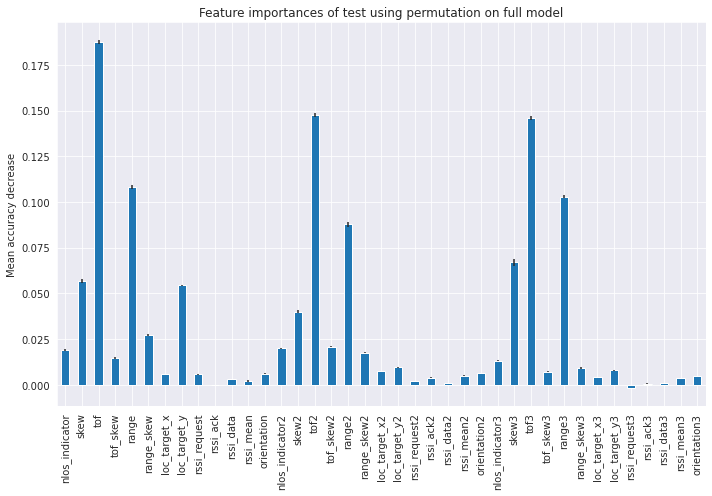

In [255]:
print_feature(reg_tab1,X_test_tab1,Y_test_tab1,X_train_tab1, 2, "feature_tableau1")

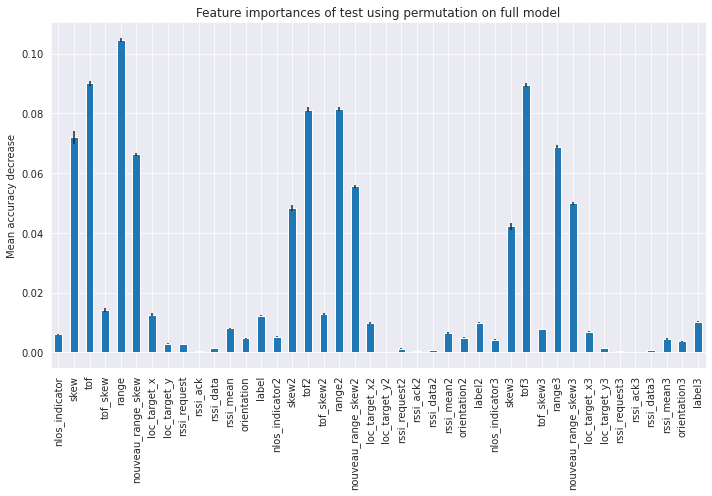

In [256]:
print_feature(reg_tab2,X_test_tab2,Y_test_tab2,X_train_tab2, 2,"feature_tableau2")

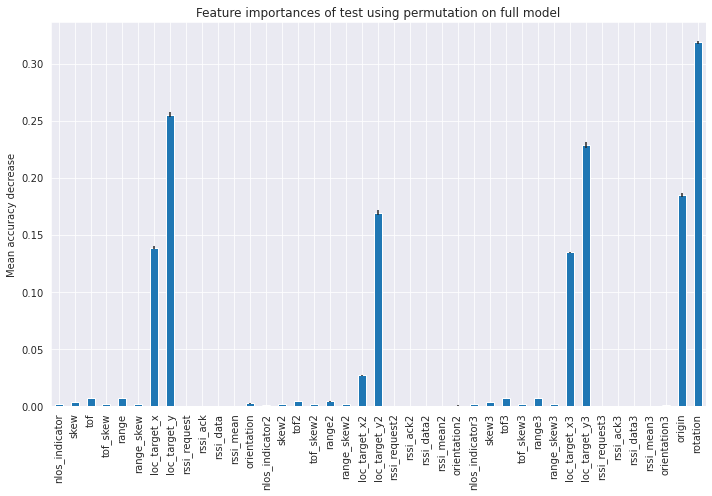

In [259]:
print_feature(reg_tab3,X_test_tab3,Y_test_tab3,X_train_tab3, None,"feature_tableau3")

## <center>Graph sur les prédictions</center>

In [248]:
def graph_position(data_pred,data_real) :
    predic_position_opti = pd.DataFrame(data_pred, columns=['loc_initiator_x','loc_initiator_y'])
    plt.figure(figsize=(10, 7))
    plt.plot(predic_position_opti['loc_initiator_x'],predic_position_opti['loc_initiator_y'],'*r',label='prediction of initiator')
    plt.plot(data_real['loc_target_x'],data_real['loc_target_y'],"*b", label='target place')
    plt.xlabel("x location", fontsize=16)
    plt.ylabel("y location", fontsize=16)
    plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    plt.title('Predictive positions of initiator (in red)', fontsize=20)
    plt.show()

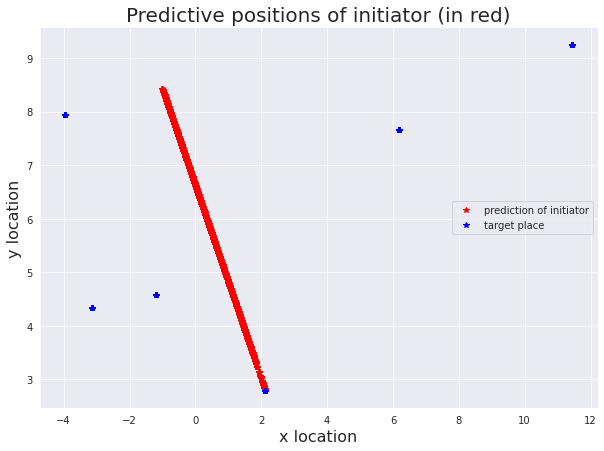

In [262]:
graph_position(pred_test_tab1, test_tab1)

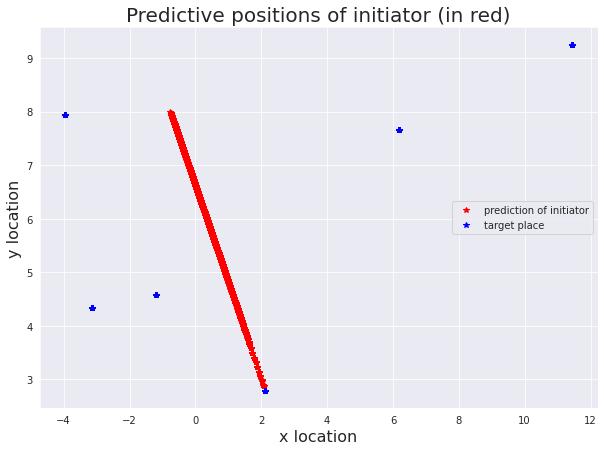

In [261]:
graph_position(pred_test_tab2, test_tab2)

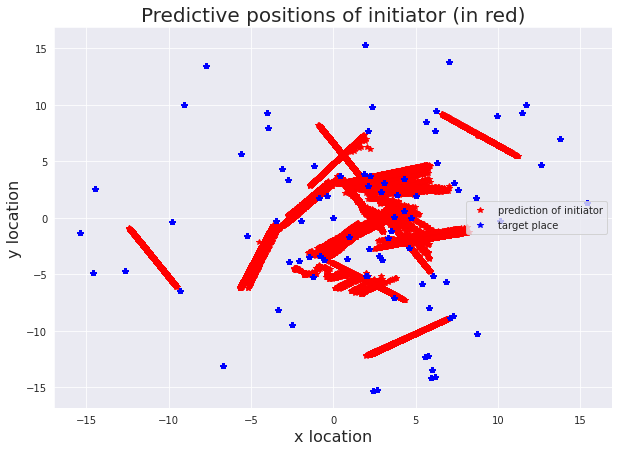

In [260]:
graph_position(pred_test_tab3, test_tab3)